# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

/home/nao/.pyenv/versions/3.7.5/envs/py37_tf2/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


tensorflow version : 2.0.0


# Create input data and deep learning laye

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((len(x_train), 784)).astype('float32') / 255
x_test = x_test.reshape((len(x_test), 784)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


model = models.Sequential()
model.add(layers.Reshape((28, 28, 1),
                         input_shape=(28*28,),
                         name='reshape'))
model.add(layers.Conv2D(32, (5, 5),  padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True,
                        activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.3, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
hidden (Dense)               (None, 512)               8

# Trainning

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2335 - accuracy: 0.9289 - val_loss: 0.0496 - val_accuracy: 0.9842
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0363 - val_accuracy: 0.9878
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0400 - accuracy: 0.9880 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0222 - val_accuracy: 0.9916
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0216 - val_accuracy: 0.9927
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0228 - val_accuracy: 0.9917
Epoch 7/10
60000/60000 [==============================] 

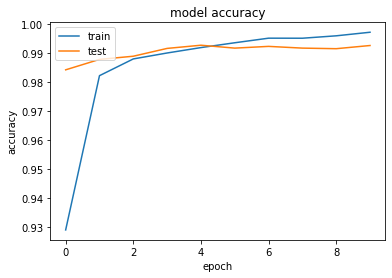

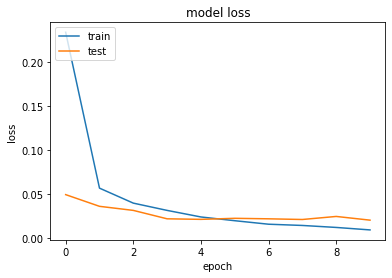

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=256, epochs=10)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [4]:
model.save('models\\cnn_mnist.h5')

print(model.input)
print(model.output)

Tensor("reshape_input:0", shape=(None, 784), dtype=float32)
Tensor("softmax/Identity:0", shape=(None, 10), dtype=float32)


# Predict

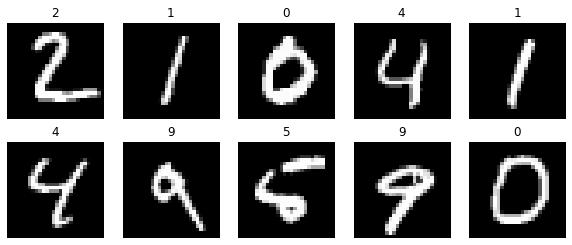

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((len(x_train), 28*28)).astype('float32')
x_test = x_test.reshape((len(x_test), 28*28)).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

model = models.load_model('models\\cnn_mnist.h5')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num].reshape(28, 28), cmap="gray")
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, len(x))
    plt.title(np.argmax(model.predict(x)))